[View in Colaboratory](https://colab.research.google.com/github/WillArevalo/ML-Comparision-characters-FIFA2018/blob/master/fifa_18_data_set_kaggle.ipynb)

# Fifa 18 More Complete Player Dataset (Analytics)

## Conexión con la API de Kaggle para acceder el DataSet desde Colabority usando autenticación con Google Drive

In [1]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d6/3c/92/375decc0cf0a65b281db3cca9b8e21dc27b8ebc4d1ce29afca
Successfully built kaggle


In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


### Descarga del DataSet

In [3]:
!kaggle datasets download -d kevinmh/fifa-18-more-complete-player-dataset -p /content/kaggle

fifa-18-more-complete-player-dataset.zip: Downloaded 5MB of 5MB to /content/kaggle


## Creación del Data Frame

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/kaggle/complete.csv', header=0, sep=',', quotechar='"')
data.head(27)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
5,188545,R. Lewandowski,Robert Lewandowski,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,2146,28,German Bundesliga,1988-08-21,185.0,...,False,False,False,False,False,False,False,False,False,False
6,193080,De Gea,David De Gea Quintana,Manchester United,https://cdn.sofifa.org/18/teams/11.png,1458,26,English Premier League,1990-11-07,193.0,...,False,False,False,False,False,False,False,False,False,True
7,183277,E. Hazard,Eden Hazard,Chelsea,https://cdn.sofifa.org/18/teams/5.png,2096,26,English Premier League,1991-01-07,173.0,...,False,False,False,False,False,False,False,False,False,False
8,182521,T. Kroos,Toni Kroos,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2165,27,Spanish Primera División,1990-01-04,182.0,...,False,False,False,False,False,False,False,False,False,False
9,167664,G. Higuaín,Gonzalo Higuaín,Juventus,https://cdn.sofifa.org/18/teams/45.png,1961,29,Italian Serie A,1987-12-10,184.0,...,False,False,False,False,False,False,False,False,False,False


## Analisis Exploratorio de los datos

***Dimenciones del DataSet***

In [5]:
data.shape

(17994, 185)

***Algunas columnas del DataSet***

In [6]:
data.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

***Revisión de Indices***

In [7]:
data.index

RangeIndex(start=0, stop=17994, step=1)

***Como se ve el indice de un jugador***

In [0]:
#messi = data.loc[1,:]
#messi

### Separación de variables según su tipo

>* ***Vamos a discriminar datos del club o nacionalidad debido a que nuestra intención principal es buscar jugadores similares sin importar su procendencia, con la intención de descubirir talentos no contemplados al enfocarnos solamente en ligas de renombre.***




In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 14.3+ MB


### Mascara de datos obj (Cadenas de Texto)

In [10]:
obj = (data.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]
type(obj_cols)

useless_obj = ['name', 'club', 'club_logo', 'league','flag', 'nationality', 'photo', 'body_type', 'birth_date', 'work_rate_att', 'work_rate_def']

for item in useless_obj:
  obj_cols.remove(item)
  
print(obj_cols)

print("""
Valores de {}
{}""".format(obj_cols[1], data['preferred_foot'].value_counts()))
print(obj_cols)
      

['full_name', 'preferred_foot']

Valores de preferred_foot
Right    13743
Left      4251
Name: preferred_foot, dtype: int64
['full_name', 'preferred_foot']


### Mascara de datos bool

Para este caso en nuestro modelo no vamos a tener en cuenta los datos booleanos porque describen una caracteristica propia de cada jugador, lo cual puede llevarnos a pensar que un jugador no es similar a otro aunque tengan puntajes de cada posicion muy similar.

In [11]:
boolean = (data.dtypes == bool)
boolean_cols = [c for c in boolean.index if boolean[c]]
len(boolean_cols)
print(boolean_cols)

['real_face', '1_on_1_rush_trait', 'acrobatic_clearance_trait', 'argues_with_officials_trait', 'avoids_using_weaker_foot_trait', 'backs_into_player_trait', 'bicycle_kicks_trait', 'cautious_with_crosses_trait', 'chip_shot_trait', 'chipped_penalty_trait', 'comes_for_crosses_trait', 'corner_specialist_trait', 'diver_trait', 'dives_into_tackles_trait', 'diving_header_trait', 'driven_pass_trait', 'early_crosser_trait', "fan's_favourite_trait", 'fancy_flicks_trait', 'finesse_shot_trait', 'flair_trait', 'flair_passes_trait', 'gk_flat_kick_trait', 'gk_long_throw_trait', 'gk_up_for_corners_trait', 'giant_throw_in_trait', 'inflexible_trait', 'injury_free_trait', 'injury_prone_trait', 'leadership_trait', 'long_passer_trait', 'long_shot_taker_trait', 'long_throw_in_trait', 'one_club_player_trait', 'outside_foot_shot_trait', 'playmaker_trait', 'power_free_kick_trait', 'power_header_trait', 'puncher_trait', 'rushes_out_of_goal_trait', 'saves_with_feet_trait', 'second_wind_trait', 'selfish_trait', 's

### Mascara de datos númericos

**Special Feature**

Este valor es referente a lo especial que es el jugador en el mercado, lo cual nos lleva de nuevo a establecer que no es un dato que queremos evaluar, pues nuestra intención es encontrar alternativas nuevas.

In [12]:
data[['full_name','special']].tail()

,full_name,special
17989,Adam Kelsey,755
17990,Barry Richardson,832
17991,Jordan Young,1194
17992,Josh Lundstram,1302
17993,Leslie Sackey,1031


In [13]:
num = (data.dtypes == float) | (data.dtypes == int)
num_cols = [c for c in num.index if num[c]==True]

#Removemos reputación internacional por lo que ya destacabamos de descubrir talentos
useless_num = ['special','eur_value', 'eur_wage', 'eur_release_clause', 'international_reputation', 'sho', 'pas', 'dri', 'def', 'phy', 'skill_moves',  'composure', 'pac', 'ID']

for item in useless_num:
  num_cols.remove(item)
  
len(num_cols)
print(num_cols)

['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']


In [14]:
data_obj = data[obj_cols]
data_obj.head(1)

,full_name,preferred_foot
0,C. Ronaldo dos Santos Aveiro,Right


In [15]:
data_bool = data[boolean_cols]
data_bool.head(1)

,real_face,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
data_num = data[num_cols]
data_num.head(1)

,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,heading_accuracy,short_passing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,32,185.0,80.0,94,94,4,85,94,88,83,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN


In [17]:
data_num.describe()

,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,heading_accuracy,short_passing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,2021.000000
mean,25.120151,181.271980,75.400856,66.253029,71.200400,2.948927,49.806046,45.330388,52.379293,58.338891,...,55.553747,56.990985,57.710574,58.216115,59.042384,59.262819,58.515244,56.871220,55.553747,64.714003
std,4.617428,6.690392,6.994824,6.946729,6.082015,0.661107,18.436764,19.479680,17.395498,14.867599,...,12.183008,9.773546,9.119380,9.162295,9.898161,9.845668,8.844482,10.285525,12.183008,7.661938
min,16.000000,155.000000,49.000000,46.000000,46.000000,1.000000,5.000000,2.000000,4.000000,10.000000,...,25.000000,30.000000,31.000000,31.000000,27.000000,27.000000,30.000000,26.000000,25.000000,46.000000
25%,21.000000,177.000000,70.000000,62.000000,67.000000,3.000000,38.000000,29.000000,45.000000,53.000000,...,45.000000,50.000000,51.000000,52.000000,53.000000,53.000000,53.000000,49.000000,45.000000,59.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,3.000000,54.000000,48.000000,56.000000,62.000000,...,57.000000,58.000000,58.000000,59.000000,60.000000,60.000000,59.000000,58.000000,57.000000,65.000000
75%,28.000000,186.000000,80.000000,71.000000,75.000000,3.000000,64.000000,61.750000,64.000000,68.000000,...,65.000000,64.000000,64.000000,65.000000,66.000000,66.000000,65.000000,65.000000,65.000000,70.000000
max,47.000000,205.000000,110.000000,94.000000,94.000000,5.000000,90.000000,95.000000,94.000000,92.000000,...,87.000000,84.000000,85.000000,92.000000,92.000000,92.000000,87.000000,85.000000,87.000000,92.000000


### Entiendiendo los datos con Gráficas

Text(0,0.5,'# Characters')

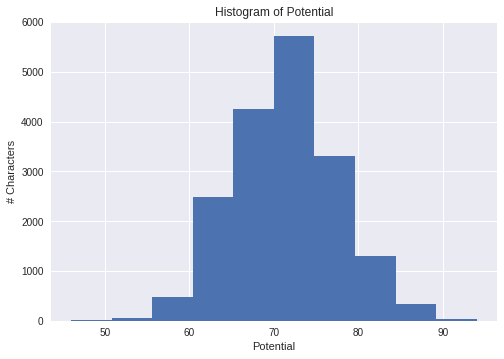

In [18]:
pote_hist = data_num['potential'].hist()
pote_hist.set_title("Histogram of Potential")
pote_hist.set_xlabel("Potential")
pote_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

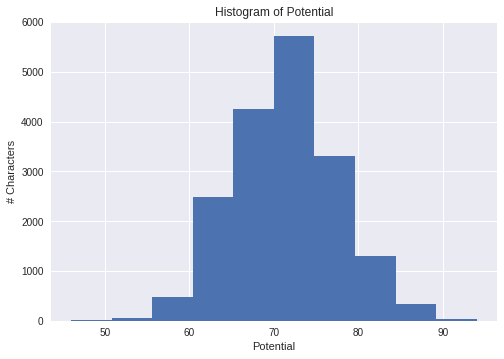

In [19]:
pote_hist = data_num['potential'].hist()
pote_hist.set_title("Histogram of Potential")
pote_hist.set_xlabel("Potential")
pote_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

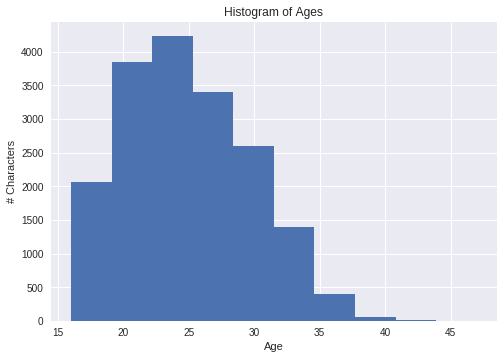

In [20]:
age_hist = data_num['age'].hist()
age_hist.set_title("Histogram of Ages")
age_hist.set_xlabel("Age")
age_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

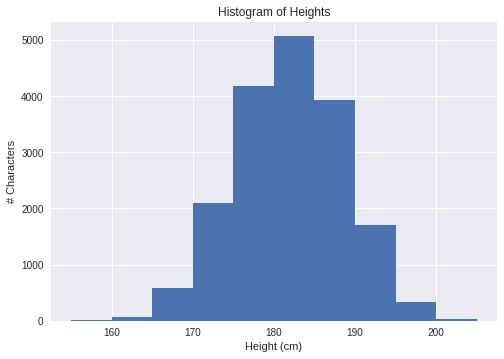

In [21]:
age_hist = data_num['height_cm'].hist()
age_hist.set_title("Histogram of Heights")
age_hist.set_xlabel("Height (cm)")
age_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

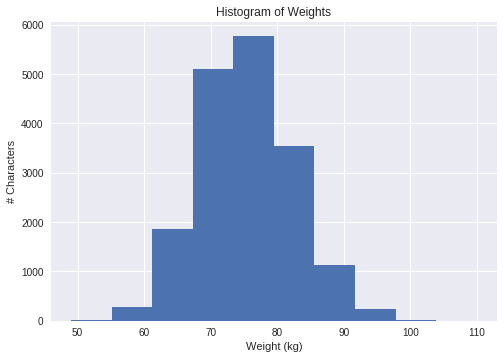

In [22]:
age_hist = data_num['weight_kg'].hist()
age_hist.set_title("Histogram of Weights")
age_hist.set_xlabel("Weight (kg)")
age_hist.set_ylabel("# Characters")

In [0]:
comparison_data = data[obj_cols + num_cols]

In [24]:
comparison_data.head()

,full_name,preferred_foot,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,C. Ronaldo dos Santos Aveiro,Right,32,185.0,80.0,94,94,4,85,94,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,Lionel Messi,Left,30,170.0,72.0,93,93,4,77,95,...,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,Neymar da Silva Santos Jr.,Right,25,175.0,68.0,92,94,5,75,89,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,Luis Suárez,Right,30,182.0,86.0,92,92,4,77,94,...,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,Manuel Neuer,Right,31,193.0,92.0,92,92,4,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


In [25]:
data.shape

(17994, 185)

In [26]:
comparison_data.shape

(17994, 68)

In [27]:
comparison_data.columns

Index(['full_name', 'preferred_foot', 'age', 'height_cm', 'weight_kg',
       'overall', 'potential', 'weak_foot', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram',
       'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm',
       'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb',
       'gk'],
      dtype='object')

full_name, work_rate_att, work_rate_def, ID, pac, sho, pas, dri, def, phy, skill_moves,  composure

In [28]:
messi = comparison_data.loc[1,:]
messi

full_name             Lionel Messi
preferred_foot                Left
age                             30
height_cm                      170
weight_kg                       72
overall                         93
potential                       93
weak_foot                        4
crossing                        77
finishing                       95
heading_accuracy                71
short_passing                   88
volleys                         85
dribbling                       97
curve                           89
free_kick_accuracy              90
long_passing                    87
ball_control                    95
acceleration                    92
sprint_speed                    87
agility                         90
reactions                       95
balance                         95
shot_power                      85
jumping                         68
stamina                         73
strength                        59
long_shots                      88
aggression          

**Convirtiendo valores de tipo obj a bool**

In [29]:
comparison_data = comparison_data.rename(index=str, columns={"preferred_foot": "prefered_foot_left"})
comparison_data['prefered_foot_left'] = comparison_data['prefered_foot_left'].replace({'Left': 1, 'Right': 0})
comparison_data.head()

,full_name,prefered_foot_left,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,C. Ronaldo dos Santos Aveiro,0,32,185.0,80.0,94,94,4,85,94,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,Lionel Messi,1,30,170.0,72.0,93,93,4,77,95,...,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,Neymar da Silva Santos Jr.,0,25,175.0,68.0,92,94,5,75,89,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,Luis Suárez,0,30,182.0,86.0,92,92,4,77,94,...,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,Manuel Neuer,0,31,193.0,92.0,92,92,4,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


In [30]:
"""def hamdist(str1, str2):
  diffs = 0
  for ch1, ch2 in zip(str1, str2):
    if ch1 != ch2:
      diffs += 1
      
  return diffs"""


'def hamdist(str1, str2):\n  diffs = 0\n  for ch1, ch2 in zip(str1, str2):\n    if ch1 != ch2:\n      diffs += 1\n      \n  return diffs'

## Comparación de prueba paso 4

In [31]:
jugador1 = comparison_data.loc[comparison_data['full_name'].isin(['Neymar da Silva Santos Jr.'])]
jugador2 = comparison_data.loc[comparison_data['full_name'].isin(['Lionel Messi'])]

jugador1 = jugador1.drop('full_name',axis=1)
print(jugador1.columns)
jugador2 = jugador2.drop('full_name',axis=1)

Index(['prefered_foot_left', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk'],
      dtype='object')


### Score Comparación de Similitud

In [0]:
diff = []
for i in range(len(jugador1.values[0])):
  
  if (abs(jugador1.values[0][i] - jugador2.values[0][i])) < 3:
    diff.append(1)
  else:
    diff.append(0)

In [33]:
suma = 0
for el in diff:
  suma += el
  
  
suma

24

## Busqueda de posiciones importantes

In [34]:
jugador1.columns

Index(['prefered_foot_left', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk'],
      dtype='object')

In [35]:
#df.loc[:, 'foo':'sat']
jugador_pos = jugador1[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]
jugador_pos.head()
type(jugador_pos)

pandas.core.frame.DataFrame

In [36]:
features_target = []
for i in range(3):
  features_target.append(jugador_pos.idxmax(axis = 1)[0])
  jugador_pos = jugador_pos.drop(features_target[i], axis=1)
  
features_target

['rw', 'lw', 'rf']

### busqueda de coincidencia en posiciones destacadas de los demas jugadores

In [37]:
jugadores_pos = comparison_data[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]
type(jugadores_pos.head())

pandas.core.frame.DataFrame

In [38]:
jugador_pos_base = jugador2[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]

jugador_pos_1 = jugador2[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]
jugador_pos.head()

,rs,ram,rcm,rm,rdm,rcb,rb,rwb,st,cf,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
2,84.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,88.0,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN


In [39]:
features_find = []
for i in range(4):
  features_find.append(jugador_pos_1.idxmax(axis = 1)[0])
  jugador_pos_1 = jugador_pos_1.drop(features_find[i], axis=1)
  
features_find
    

['rf', 'ram', 'cf', 'cam']

In [40]:
jugador_3 = jugadores_pos[17993:17994]
jugador_3

,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
17993,31.0,29.0,29.0,29.0,30.0,30.0,38.0,45.0,40.0,38.0,...,45.0,40.0,38.0,31.0,29.0,29.0,30.0,38.0,45.0,NaN


In [41]:
jugador_3.idxmax(axis = 1)[0]


'rcb'

In [42]:
jugadores_pos.shape[0]

17994

### Revisión de mejores posiciones para cada jugador

In [0]:
feature_try = ['rs', 'rf', 'st', 'cf', 'ls', 'lf', 'rw', 'ram', 'lw', 'cam']
#similares = []
score = []
similares = {}
for i in range(jugadores_pos.shape[0]):
#for i in range(30):
  features_find_all = []
  jugador_comparison = jugadores_pos[i:i+1]
  jugador_i = jugadores_pos[i:i+1]
  #print(comparison_data[i:i+1]['full_name'][0])
  for j in range(4):
    if pd.isnull(jugador_i.idxmax(axis = 1)[0]):
      break
    features_find_all.append(jugador_i.idxmax(axis = 1)[0])
    jugador_i = jugador_i.drop(features_find_all[j], axis=1)
  """Que tenga las mismas caracteristicas"""
  if (len(np.setdiff1d(features_find,features_find_all)) <= 2):
  #if (len(np.setdiff1d(feature_try,features_find_all)) < 2):
    #print("Similar")
    suma = 0
    #similares.append(comparison_data[i:i+1]['full_name'][0])
    similares.update({comparison_data[i:i+1]['full_name'][0]:suma})
    #similares[comparison_data[i:i+1]['full_name'][0]]=3
    
    diff = []
    #print(jugador_comparison.values[0])
    #print(jugador_pos_base.values[0])
    for k in range(len(jugador_pos_base.values[0])):
  
      if (abs(jugador_comparison.values[0][k] - jugador_pos_base.values[0][k])) < 3:
        diff.append(1)
      else:
        diff.append(0)
        
    
    for el in diff:
      suma += el
    #similares.append(comparison_data[i:i+1]['full_name'][0])  
    score.append(suma)
    
    #similares.update({comparison_data[i:i+1]['full_name'][0]:suma})
    similares[comparison_data[i:i+1]['full_name'][0]]=suma
    #break
    
  #print(features_find)
  #print(features_find_all)

In [0]:
#similares

In [45]:
len(score)

2712

In [0]:
import operator
sorted_x = sorted(similares.items(), key=operator.itemgetter(1))

In [0]:
sorted_x.reverse()

In [48]:
sorted_x

[('Lionel Messi', 26),
 ('Neymar da Silva Santos Jr.', 12),
 ('Juan Pablo Añor', 10),
 ('Carles Gil Pareja', 10),
 ('Max Meyer', 10),
 ('Domenico Berardi', 10),
 ('Yacine Brahimi', 10),
 ('Douglas Costa de Souza', 10),
 ('Federico Bernardeschi', 10),
 ('Shinji Kagawa', 10),
 ('Ousmane Dembélé', 10),
 ('Juan Manuel Mata García', 10),
 ('Arjen Robben', 10),
 ('Eden Hazard', 10),
 ('Gaston Brugman', 8),
 ('António José Pinheiro Carvalho', 8),
 ('Giakumis Gutierrez', 8),
 ('Carlos Villanueva', 8),
 ('Danilo Manuel Aldair Rochela', 8),
 ('Wes Hoolahan', 8),
 ('Riccardo Saponara', 8),
 ('Aaron McEneff', 7),
 ('Tristan Nydam', 7),
 ('Waleed Hezam Al Anazi', 7),
 ('Okan Kurt', 7),
 ('Alikhan Shavaev', 7),
 ('John Russell', 7),
 ('Gonzalo Lanfuente', 7),
 ('Woo Hyeok Lee', 7),
 ('Richard Neudecker', 7),
 ('Felipe Melvin Soldivia Costa', 7),
 ('Seung Bum Oh', 7),
 ('Mattia Vitale', 7),
 ('Stephen Mallan', 7),
 ('Willi Evseev', 7),
 ('Amin Affane', 7),
 ('Florent Cuvelier', 7),
 ('Jackson Yueill'